<a href="https://colab.research.google.com/github/Subhash-K45/python/blob/main/Dairy%20Forming/Dairy_Products_analyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv("dairy_dataset.csv")

In [9]:
data.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,17-02-2022,5,Ice Cream,Dodla Dairy,222.40,85.72,...,27-12-2021,21-01-2022,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,01-12-2021,1,Milk,Amul,687.48,42.61,...,03-10-2021,25-10-2021,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,28-02-2022,4,Yogurt,Dodla Dairy,503.48,36.50,...,14-01-2022,13-02-2022,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,09-06-2019,3,Cheese,Britannia Industries,823.36,26.52,...,15-05-2019,26-07-2019,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,14-12-2020,8,Buttermilk,Mother Dairy,147.77,83.85,...,17-10-2020,28-10-2020,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [10]:
data.isna().sum()

Location                               0
Total Land Area (acres)                0
Number of Cows                         0
Farm Size                              0
Date                                   0
Product ID                             0
Product Name                           0
Brand                                  0
Quantity (liters/kg)                   0
Price per Unit                         0
Total Value                            0
Shelf Life (days)                      0
Storage Condition                      0
Production Date                        0
Expiration Date                        0
Quantity Sold (liters/kg)              0
Price per Unit (sold)                  0
Approx. Total Revenue(INR)             0
Customer Location                      0
Sales Channel                          0
Quantity in Stock (liters/kg)          0
Minimum Stock Threshold (liters/kg)    0
Reorder Quantity (liters/kg)           0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data["Location"].value_counts()

Delhi             525
Chandigarh        519
Uttar Pradesh     276
Gujarat           267
Karnataka         261
Madhya Pradesh    259
Rajasthan         256
Maharashtra       255
Haryana           253
Kerala            249
Telangana         248
Jharkhand         248
Bihar             245
West Bengal       241
Tamil Nadu        223
Name: Location, dtype: int64

Analysis of total revenue on various locations

In [13]:
total_revenue = data.groupby("Location")['Approx. Total Revenue(INR)'].sum().reset_index()

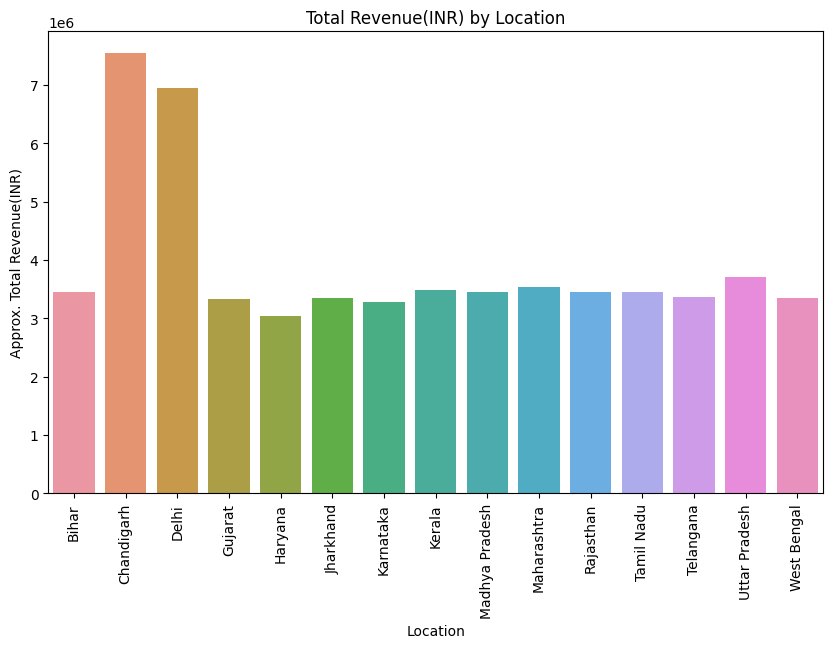

In [14]:
plt.figure(figsize = (10,6))
sns.barplot(data = total_revenue,x="Location",y="Approx. Total Revenue(INR)")
plt.title('Total Revenue(INR) by Location')
plt.xticks(rotation=90)
plt.show()

In [15]:
mean_revenue = data.groupby("Location")['Approx. Total Revenue(INR)'].mean().reset_index()

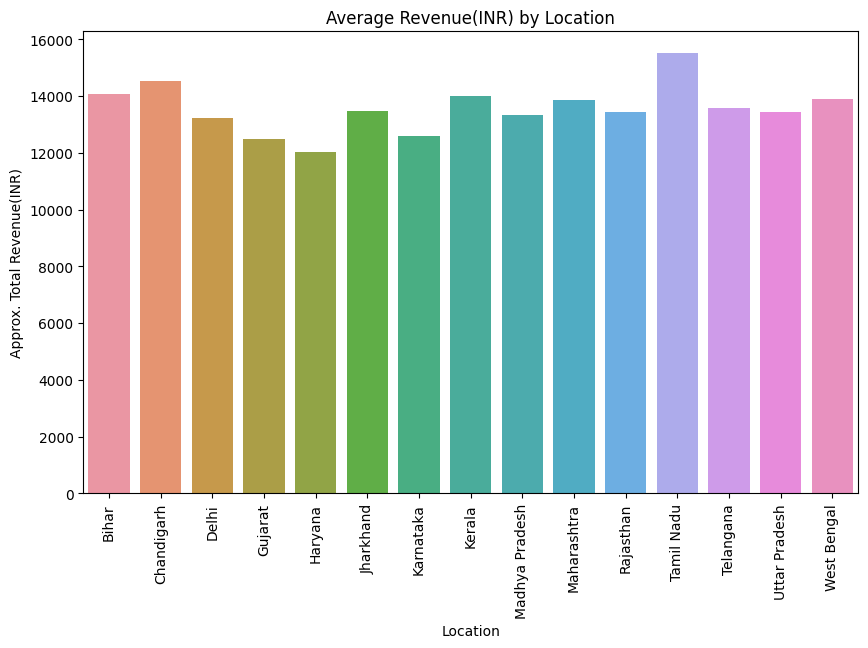

In [16]:
plt.figure(figsize = (10,6))
sns.barplot(data = mean_revenue,x="Location",y="Approx. Total Revenue(INR)")
plt.title('Average Revenue(INR) by Location')
plt.xticks(rotation=90)
plt.show()

Land areas

In [17]:
total_land_area = data.groupby("Location")["Total Land Area (acres)"].sum().reset_index()

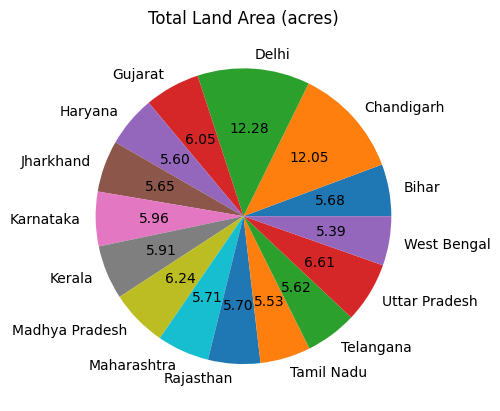

In [18]:
plt.pie(total_land_area["Total Land Area (acres)"],labels=np.array(total_land_area["Location"]),autopct="%.2f")
plt.title("Total Land Area (acres)")
plt.show()

In [19]:
data[data["Location"]=="Telangana"].groupby("Product Name")["Approx. Total Revenue(INR)"].sum()
unqiue_location = data["Location"].unique()

State Wise analysis of sales of the products

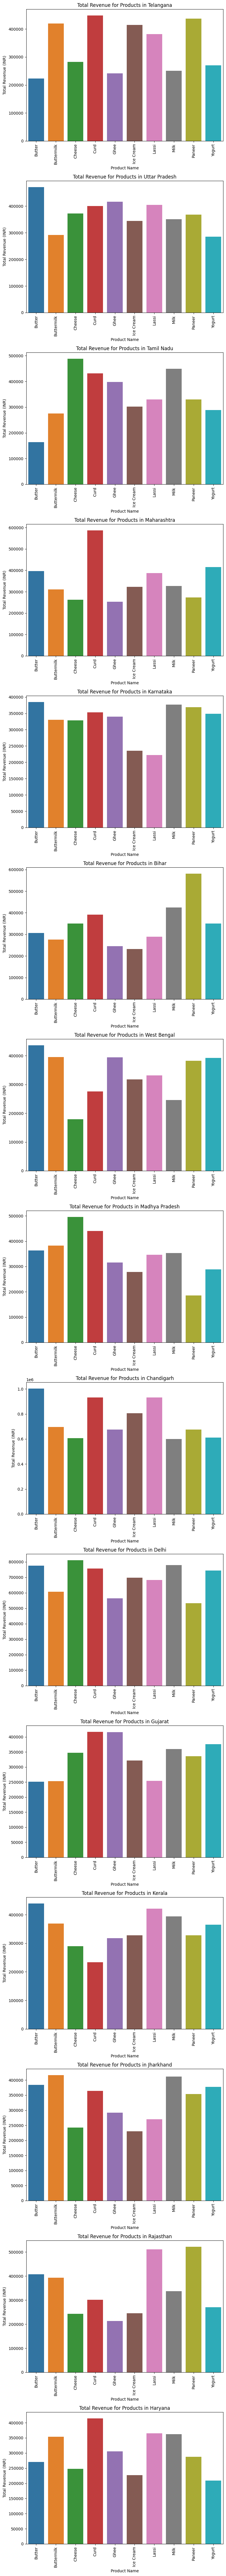

In [20]:
telangana_data = data[data["Location"] == "Telangana"]
unique_products = data["Product Name"].unique()
unique_locations = data["Location"].unique()
fig, axes = plt.subplots(nrows=len(unique_locations), figsize=(8, 6 * len(unique_locations)))
for i, location in enumerate(unique_locations):
    ax = axes[i]
    location_data = data[data["Location"] == location]
    result = location_data.groupby("Product Name")["Approx. Total Revenue(INR)"].sum().reset_index()
    sns.barplot(data=result, x="Product Name", y="Approx. Total Revenue(INR)", ax=ax)
    ax.set_title(f'Total Revenue for Products in {location}')
    ax.set_xlabel('Product Name')
    ax.set_ylabel('Total Revenue (INR)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()



State wise analysis of sales of brand

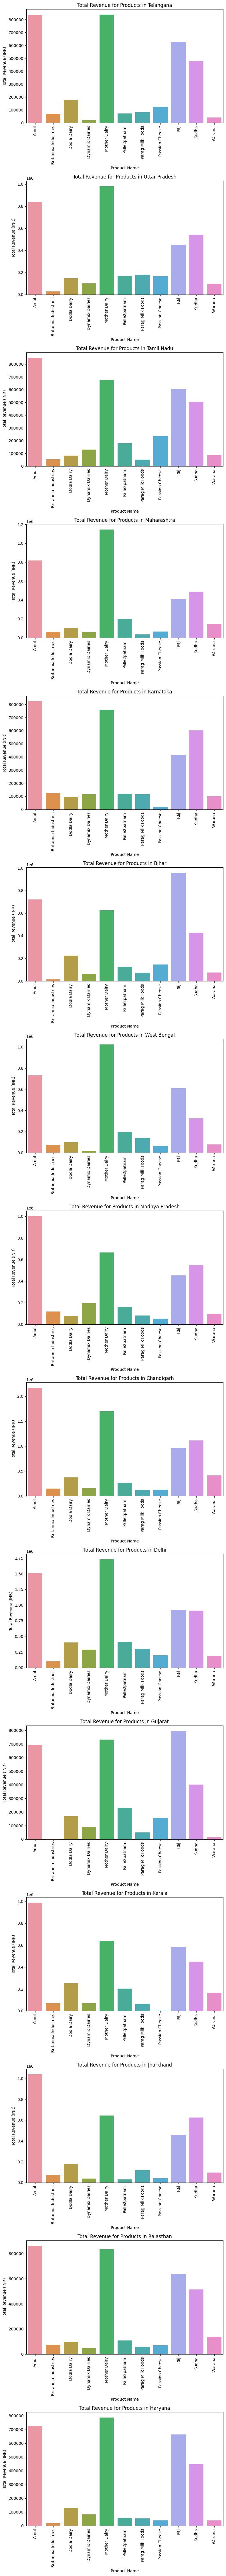

In [22]:
telangana_data = data[data["Location"] == "Telangana"]
unique_brands = data["Brand"].unique()
unique_locations = data["Location"].unique()
fig, axes = plt.subplots(nrows=len(unique_locations), figsize=(8, 6 * len(unique_locations)))
for i, location in enumerate(unique_locations):
    ax = axes[i]
    location_data = data[data["Location"] == location]
    result = location_data.groupby("Brand")["Approx. Total Revenue(INR)"].sum().reset_index()
    sns.barplot(data=result, x="Brand", y="Approx. Total Revenue(INR)", ax=ax)
    ax.set_title(f'Total Revenue for Products in {location}')
    ax.set_xlabel('Product Name')
    ax.set_ylabel('Total Revenue (INR)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [23]:
pd.DataFrame(data.groupby("Brand")["Total Land Area (acres)"].sum()).reset_index()

,Brand,Total Land Area (acres)
0,Amul,528377.46
1,Britannia Industries,51221.94
2,Dodla Dairy,111974.65
3,Dynamix Dairies,55356.87
4,Mother Dairy,497118.15
5,Palle2patnam,106237.70
6,Parag Milk Foods,53690.47
7,Passion Cheese,50724.93
8,Raj,346073.91
9,Sudha,328411.07


Average revenue of brands

In [24]:
pd.DataFrame(data.groupby("Brand")["Approx. Total Revenue(INR)"].sum()).reset_index()

,Brand,Approx. Total Revenue(INR)
0,Amul,14608864.46
1,Britannia Industries,1029522.05
2,Dodla Dairy,2604857.37
3,Dynamix Dairies,1479884.78
4,Mother Dairy,13766786.47
5,Palle2patnam,2528989.12
6,Parag Milk Foods,1516697.71
7,Passion Cheese,1498653.15
8,Raj,9560777.64
9,Sudha,8370109.56


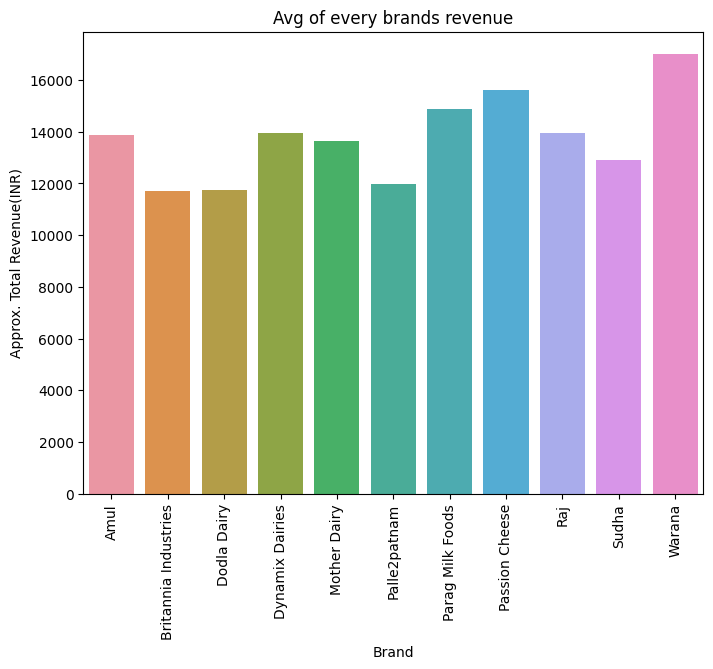

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(data = pd.DataFrame(data.groupby("Brand")["Approx. Total Revenue(INR)"].mean()).reset_index(),x="Brand",y="Approx. Total Revenue(INR)")
plt.title("Avg of every brands revenue")
plt.xticks(rotation=90)
plt.show()


By analysing the mean revenue of the product we can say that highest mean is the costliest product.

Storage conditions of the products

In [27]:
data.groupby("Product Name")["Storage Condition"].value_counts()


Product Name  Storage Condition
Butter        Frozen               226
              Refrigerated         205
Buttermilk    Refrigerated         435
Cheese        Refrigerated         219
              Frozen               182
Curd          Refrigerated         479
Ghee          Ambient              402
Ice Cream     Frozen               423
Lassi         Refrigerated         447
Milk          Polythene Packet     225
              Tetra Pack           204
Paneer        Refrigerated         441
Yogurt        Refrigerated         233
              Frozen               204
Name: Storage Condition, dtype: int64

Analysis on sales channel

In [28]:
counts = data.groupby("Brand")["Sales Channel"].value_counts().reset_index(name="Count")

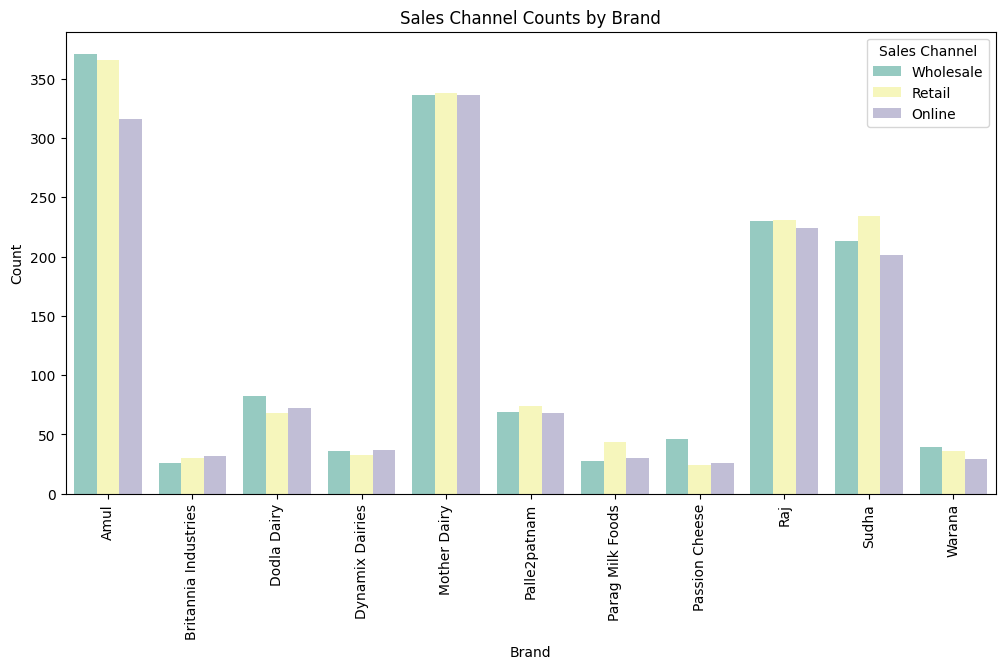

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(data=counts, x="Brand", y="Count", hue="Sales Channel", palette="Set3")
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Sales Channel Counts by Brand')
plt.xticks(rotation=90)
plt.legend(title='Sales Channel')

plt.show()

Analyis on products with sales channel

In [30]:
counts = data.groupby("Product Name")["Sales Channel"].value_counts().reset_index(name="Count")

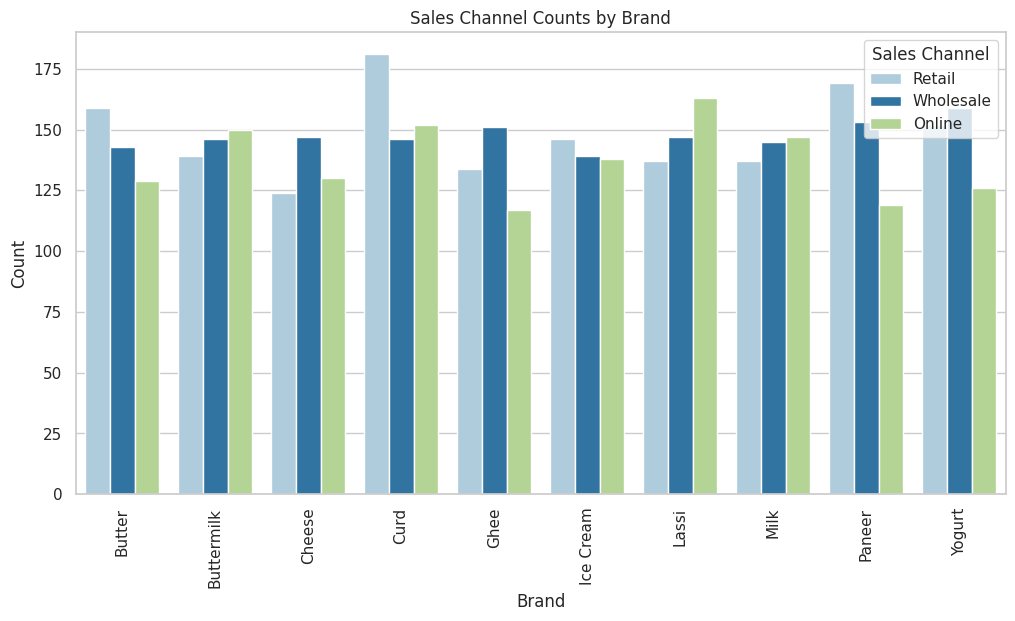

In [77]:
plt.figure(figsize=(12, 6))
sns.barplot(data=counts, x="Product Name", y="Count", hue="Sales Channel",palette="Paired")
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Sales Channel Counts by Brand')
plt.xticks(rotation=90)
plt.legend(title='Sales Channel',loc="upper right")

plt.show()

In [35]:
data.sample(5)

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
3208,Delhi,618.26,23,Large,20-04-2019,5,Ice Cream,Mother Dairy,630.45,36.58,...,06-03-2019,04-04-2019,230,36.82,8468.60,Chandigarh,Online,400,15.50,80.14
2048,West Bengal,486.21,36,Large,28-05-2020,8,Buttermilk,Mother Dairy,374.13,74.86,...,15-05-2020,28-05-2020,2,79.06,158.12,Delhi,Online,372,17.94,110.39
439,Tamil Nadu,379.10,73,Large,26-12-2022,6,Curd,Amul,649.84,89.39,...,13-11-2022,18-11-2022,314,85.38,26809.32,Rajasthan,Wholesale,335,94.99,174.00
442,Karnataka,333.80,14,Large,18-10-2022,9,Paneer,Mother Dairy,271.52,12.92,...,10-09-2022,22-09-2022,105,14.83,1557.15,Gujarat,Online,166,24.65,199.43
3849,Chandigarh,855.94,45,Medium,27-04-2021,1,Milk,Sudha,316.70,44.56,...,26-04-2021,18-05-2021,121,45.05,5451.05,Delhi,Online,195,17.21,155.99


Comparing quantity sold with quantity in stock

In [79]:
df=pd.read_csv("dairy_dataset.csv")
df_combined = pd.melt(df, id_vars=['Location'], value_vars=['Quantity Sold (liters/kg)', 'Quantity in Stock (liters/kg)'],
                      var_name='Type', value_name='Quantity (liters/kg)')


<ipython-input-79-ae53cf0e555e>:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_combined = pd.melt(df, id_vars=['Location'], value_vars=['Quantity Sold (liters/kg)', 'Quantity in Stock (liters/kg)'],


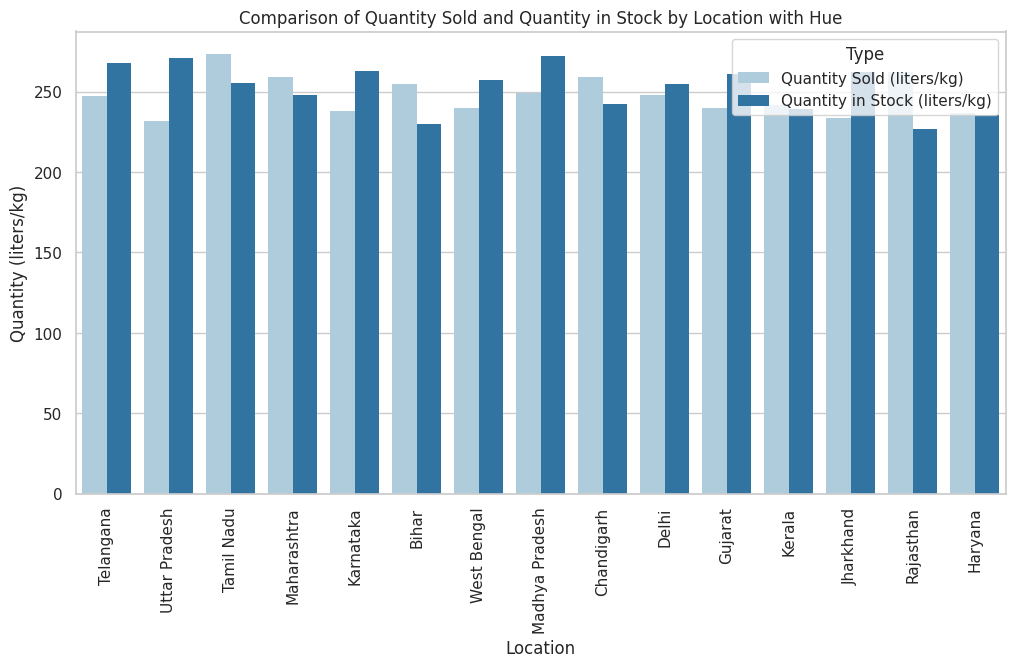

In [82]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Location', y='Quantity (liters/kg)', hue='Type', data=df_combined, palette="Paired", edgecolor="none",errorbar=None)
plt.xlabel("Location")
plt.ylabel("Quantity (liters/kg)")
plt.title("Comparison of Quantity Sold and Quantity in Stock by Location")
plt.legend(title='Type', loc='upper right')
plt.xticks(rotation = 90)
plt.show()

Comparing price sold with price fixed.

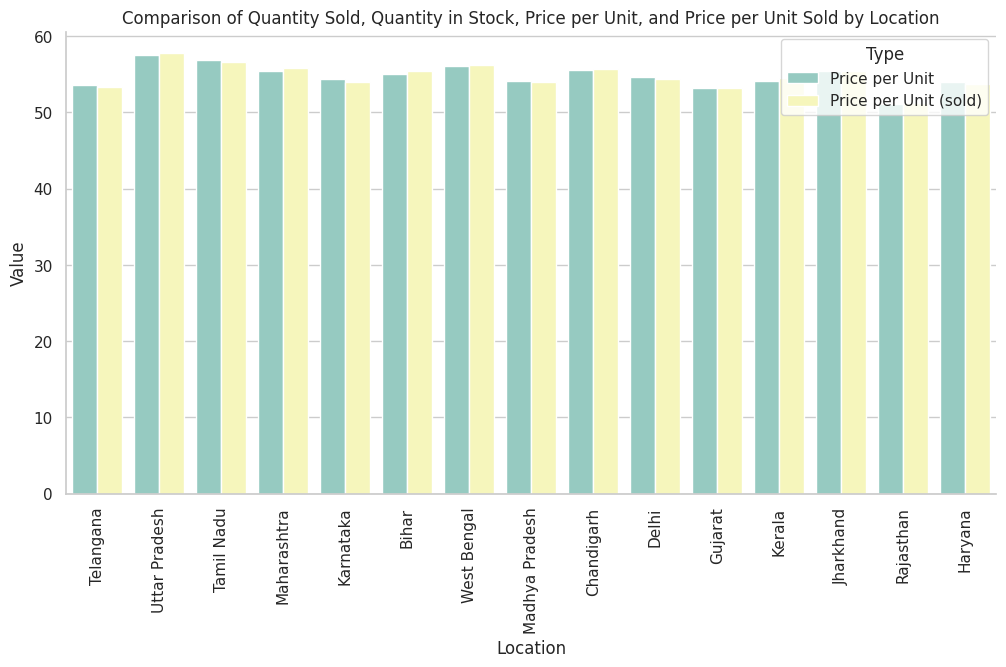

In [92]:
df_combined = pd.melt(df, id_vars=['Location'], value_vars=['Price per Unit', 'Price per Unit (sold)'],var_name='Type', value_name='Value')
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Location', y='Value', hue='Type', data=df_combined, palette="Set3",errorbar=None)
plt.xlabel("Location")
plt.ylabel("Value")
plt.title("Comparison of Quantity Sold, Quantity in Stock, Price per Unit, and Price per Unit Sold by Location")
plt.legend(title='Type', loc='upper right')
plt.xticks(rotation = 90)
sns.despine()
plt.show()